<a href="https://colab.research.google.com/github/ssv273/Neural_Univesity/blob/main/hw_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Устанавливаем пакет librosa для работы с аудио
!pip install librosa==0.8.0

     |████████████████████████████████| 183 kB 5.1 MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201395 sha256=8e5c50e9d163ea39abb2457957ee09abf51dde023d6ef9b6686ebf14fde02266
  Stored in directory: /root/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
Successfully built librosa
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1


In [2]:
# Подключаем библиотеки
import sklearn
from IPython.display import Audio  # Воспроизведение аудиофайлов
import time                        # Для подсчёта времени 
import zipfile                     # Для разорхивации базы
import pandas as pd                # Для работы с табличными данными
from tensorflow.keras import utils # Для to_categorical
from google.colab import files     # Загрузка файлов
import os                          # Работа с папками и файлами
import librosa                     # Параметризация аудио
import librosa.feature             # Инструменты для параметризации
import numpy as np                 # Numpy массивы
import matplotlib.pyplot as plt    # Отображение графиков
from tqdm.notebook import tqdm

# Отрисовка графиков в ячейках collab
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop # Оптимизатор для задания шага обучения
from tensorflow.keras.models import Sequential, Model # Два формата модели keras
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, MaxPooling1D, Reshape, Lambda # Базовые слови
from sklearn.model_selection import train_test_split # Разбиение на обучающую и проверочную выборку
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Для нормировки данных
from tensorflow.keras.losses import binary_crossentropy # Импортируем функцию потерь
from tensorflow.keras.layers import LeakyReLU # Импортируем функцию активации отдельным слоем
from tensorflow.keras import backend as K # Устанавливаем переменную для окружения кераса


In [3]:
# Разархивируем базу
bi = zipfile.ZipFile('/content/drive/MyDrive/Neural_Univesity/hw_28/база пения птиц. 88 классов.zip', 'r')
bi.extractall()

In [4]:
# Подгружаем данные нашей базы
data = pd.read_csv('birdsong_metadata.csv')

In [5]:
# Выведем данные
data.head(10)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/
3,82715,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
4,64685,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
5,64686,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
6,120664,Acrocephalus,schoenobaenus,Sedge Warbler,david m,United Kingdom,56.5860,-6.1855,"male, song",http://creativecommons.org/licenses/by-nc-nd/3.0/
7,120666,Acrocephalus,schoenobaenus,Sedge Warbler,david m,United Kingdom,56.5860,-6.1855,"male, song",http://creativecommons.org/licenses/by-nc-nd/3.0/
8,76767,Acrocephalus,schoenobaenus,Sedge Warbler,Richard Dunn,United Kingdom,55.2809,-1.5801,song,http://creativecommons.org/licenses/by-nc-nd/2.5/
9,124052,Acrocephalus,scirpaceus,Eurasian Reed Warbler,david m,United Kingdom,51.8985,-0.5372,"call, female, male, song",http://creativecommons.org/licenses/by-nc-nd/3.0/


In [6]:
# Выведем все названия птиц(колонка english_cname)
bb = data.english_cname.unique()
bb

array(['Common Redpoll', 'Marsh Warbler', 'Sedge Warbler',
       'Eurasian Reed Warbler', 'Long-tailed Tit', 'Eurasian Skylark',
       'Meadow Pipit', 'Tree Pipit', 'Common Swift', 'Canada Goose',
       'Dunlin', 'European Nightjar', 'European Goldfinch',
       'Eurasian Treecreeper', 'European Greenfinch', 'Black-headed Gull',
       'Western Jackdaw', 'Rock Dove', 'Stock Dove', 'Common Wood Pigeon',
       'Northern Raven', 'Carrion Crow', 'Rook', 'Common Cuckoo',
       'Eurasian Blue Tit', 'Common House Martin',
       'Great Spotted Woodpecker', 'Black Woodpecker', 'Corn Bunting',
       'Yellowhammer', 'Common Reed Bunting', 'European Robin',
       'Common Chaffinch', 'Eurasian Coot', 'Common Snipe',
       'Common Moorhen', 'Eurasian Jay', 'Red-throated Loon',
       'Eurasian Oystercatcher', 'Barn Swallow', 'Eurasian Wryneck',
       'Willow Ptarmigan', 'European Herring Gull', 'Common Linnet',
       'River Warbler', 'Red Crossbill', 'Common Nightingale',
       'European

In [7]:
# Создадим список названий птиц в соответствии с тем порядком, в котором они подгружаются
v=[]
for l in os.listdir(f'/content/songs/songs/'):
  songname = f'{l}'
  list(songname)
  a = int(songname[2:-5]) # Чтобы достать из названия файла только id
  for i in range(len(data['file_id'].values)):
    if a==data['file_id'].values[i]:
      v.append(i) # Составляем список id в том порядке, в котором загружаются файлы

birds1=[]
for j in v:
  birds1.append(data['english_cname'][j])

print(birds1)
print(len(birds1))

['Eurasian Nuthatch', 'Eurasian Jay', 'Meadow Pipit', 'Northern Raven', 'Redwing', 'Corn Bunting', 'Carrion Crow', 'Sedge Warbler', 'Lesser Whitethroat', 'Common Linnet', 'Goldcrest', 'Carrion Crow', 'Eurasian Treecreeper', 'River Warbler', 'Eurasian Reed Warbler', 'Common Blackbird', 'Eurasian Blue Tit', 'Eurasian Skylark', 'Willow Tit', 'Wood Sandpiper', 'Wood Sandpiper', 'Common Snipe', 'Red-throated Loon', 'Rook', 'Coal Tit', 'Redwing', 'Stock Dove', 'Common Redstart', 'Western Yellow Wagtail', 'Common Whitethroat', 'House Sparrow', 'Common Chiffchaff', 'Wood Sandpiper', 'Common House Martin', 'Common Snipe', 'Song Thrush', 'Common Cuckoo', 'Common Cuckoo', 'Great Tit', 'Common Starling', 'European Robin', 'European Greenfinch', 'Dunlin', 'Lesser Whitethroat', 'Common Redshank', 'Eurasian Wryneck', 'European Goldfinch', 'Spotted Flycatcher', 'Eurasian Golden Oriole', 'Barn Swallow', 'Wood Warbler', 'European Greenfinch', 'Grey Partridge', 'House Sparrow', 'Common Nightingale', 'Com

In [8]:

def get_features(y, sr):

  '''
    get_features - функция параметризации данных
     y - временной ряд аудио
     sr - sampling rate(по умолчанию 22050) - частота дискретизации
  '''
  # Двумерные
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) # Частота цветности
  mfcc = librosa.feature.mfcc(y=y, sr=sr)               # Мел кепстральные коэффициенты

  # Одномерные
  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr) # Спектральный центроид
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)  # Ширина полосы частот
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)    # Спектральный спад частоты
  zcr = librosa.feature.zero_crossing_rate(y)               # Пересечения нуля

  # Возвращаем получившийся список
  return chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr

In [9]:
# Создаём пустые листы
Y_train = []
y_all = []
y_len = []
sr_all = []

# Запоминаем время старта формирования выборки
curr_time = time.time()

i = 0
# Проходим по файлам папки
for filename in tqdm(os.listdir(f'/content/songs/songs/')):
  songname = f'/content/songs/songs/{filename}'
  
  # Выделим из имени песни только число
  songnum = f'{filename}'
  list(songnum)
  a = int(songnum[2:-5])
  
# Следующая часть кода предназначена для того, чтобы присвоить каждой записи
# нужный цикл, а так как у нас по 3 записи каждой птицы и они загружаются
# вразноброс, мы делаем некую фильтрацию 264 записей по 88 классам(в соответствии
# с данными таблицы .csv)

  # Пройдемся по всем значениям столбца 'file_id' и обнаружим текущую песню
  for k in range(len(data['file_id'])):

    # Ищем строку в данных соответствующую текущей записи
    if a == data['file_id'][k]:

      # Вытаскиваем значение названия птицы для текущей записи
      w = data['english_cname'][k]

      # Проходимся циклом по нашим классам(88) и присваиваем в соответствии с записью
      for t in range(len(bb)):
        if w == bb[t]:

          # Загружаем в y аудиосигнал
          y, sr = librosa.load(songname, mono=True)
          y_all.append(y)
          sr_all.append(sr)
          y_len.append(y.shape[0])
          # Добавляем в Y_train номер классов в формате ohe
          Y_train.append(utils.to_categorical(t, len(bb)))

  0%|          | 0/264 [00:00<?, ?it/s]

In [10]:
max_len = max(y_len)
max_len

5560564

In [11]:
min_len = min(y_len)
min_len

71995

In [12]:
# Создаём пустые листы
X_train_1 = []
X_train_2 = []
X_train_3 = []
X_train_4 = []
X_train_5 = []
X_train_6 = []
Y_train_new = []

for i in tqdm(range(len(y_all))):
    y = list(y_all[i])*(int(max_len / min_len) + 1)
    y = np.array(y[:max_len])
    if y.shape[0] != max_len:
        print(y.shape[0], i)
    sr = sr_all[i]
    # Превращаем сигнал в параметризованные данные и раскусываем по 4 секунды, с шагом в 4 секунды
    for p in range(0, (int(len(y)//22050))-4, 4):

        chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr = get_features(y[p*sr:(p+4)*sr], sr)

        # Добавляем строку в X_train
        X_train_1.append(chroma_stft)
        X_train_2.append(mfcc)
        X_train_3.append(spec_cent)
        X_train_4.append(spec_bw)
        X_train_5.append(rolloff)
        X_train_6.append(zcr)

        # Добавляем в Y_train номер классов в формате ohe
        Y_train_new.append(Y_train[i])

# Превращаем обучающую выборку в numpy массивы
X_train_1 = np.array(X_train_1)
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)
X_train_4 = np.array(X_train_4)
X_train_5 = np.array(X_train_5)
X_train_6 = np.array(X_train_6)
Y_train_new = np.array(Y_train_new)

  0%|          | 0/264 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [13]:
# Выводим размеры обучающей выборки
print(X_train_1.shape)
print(X_train_2.shape)
print(X_train_3.shape)
print(X_train_4.shape)
print(X_train_5.shape)
print(X_train_6.shape)
print(Y_train_new.shape)

(16368, 12, 173)
(16368, 20, 173)
(16368, 1, 173)
(16368, 1, 173)
(16368, 1, 173)
(16368, 1, 173)
(16368, 88)


In [14]:
def scale(X):
  '''
     scale() - функция для нормализации данных
     X - данные, которые нужно нормальзивать

  '''
  #global min_X # делаем переменные глобальными, чтобы использовать при предсказании тестового файла
  #global max_X # (используется когда тестируем свою загруженную песню)
  min_X = X.min()
  max_X = X.max()
  
  X = (X - min_X) / (max_X - min_X)

  return X

In [15]:
# Нормализуем тренировочные данные
X_train_1_scaled = scale(X_train_1)

#Xmin1 = min_X # Запоминаем значения, чтобы потом использовать для предикта
#Xmax1 = max_X # Запоминаем значения, чтобы потом использовать для предикта

X_train_2_scaled = scale(X_train_2)

#Xmin2 = min_X # Запоминаем значения, чтобы потом использовать для предикта
#Xmax2 = max_X # Запоминаем значения, чтобы потом использовать для предикта

In [16]:
# Разделяем на тренировочную, проверочную и тестовую выборки
mask = np.random.sample(X_train_1.shape[0])

# Создание обучающей выборки
train_mask = mask < 0.8 

# Создание проверочной выборки
val_mask = (mask >= 0.8) & (mask < 0.999)

# Создание тестовой выборки
test_mask = (mask >= 0.999)

print(len(X_train_1_scaled[train_mask]))
print(len(X_train_1_scaled[val_mask]))
print(len(X_train_1_scaled[test_mask]))

13019
3336
13


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
261/261 [==============================] - 8s 27ms/step - loss: 3.5448 - accuracy: 0.1895 - val_loss: 4.3583 - val_accuracy: 0.0938
Epoch 2/30
261/261 [==============================] - 7s 26ms/step - loss: 2.3706 - accuracy: 0.4063 - val_loss: 1.9337 - val_accuracy: 0.5555
Epoch 3/30
261/261 [==============================] - 7s 26ms/step - loss: 1.7386 - accuracy: 0.5376 - val_loss: 1.1353 - val_accuracy: 0.7620
Epoch 4/30
261/261 [==============================] - 7s 26ms/step - loss: 1.3440 - accuracy: 0.6392 - val_loss: 0.8335 - val_accuracy: 0.8135
Epoch 5/30
261/261 [==============================] - 7s 26ms/step - loss: 1.0797 - accuracy: 0.7011 - val_loss: 0.6365 - val_accuracy: 0.8522
Epoch 6/30
261/261 [==============================] - 7s 26ms/step - loss: 0.9120 - accuracy: 0.7415 - val_loss: 0.5097 - val_accuracy: 0.8879
Epoch 7/30
261/261 [==============================] - 7s 26ms/step - loss: 0.8157 - accuracy: 0.7673 - val_loss: 0.4418 - val_accuracy: 0.9053

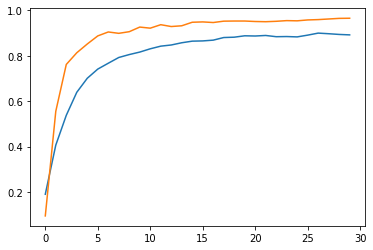

In [18]:
# Создадим инпуты соответствующих данных
input_1 = Input((12, 173))
input_2 = Input((20, 173))

# Блок 1 "Частота цветности"
x1 = BatchNormalization()(input_1)
x1 = Flatten()(x1)

# Блок 2 "Мелкепстральные коэффициенты"
x2 = BatchNormalization()(input_2)
x2 = Flatten()(x2)

# Соединяем данные всех блоков
x = concatenate([x1, x2])

# В последнем слое 88 нейронов(по количеству классов)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(88, activation='softmax')(x)

model_simple = Model([input_1, input_2], x)

model_simple.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_simple.fit([X_train_1_scaled[train_mask], X_train_2_scaled[train_mask]],
                    Y_train_new[train_mask],
                    epochs=30,
                    batch_size=50,
                    validation_data=([X_train_1_scaled[val_mask], X_train_2_scaled[val_mask]],
                    Y_train_new[val_mask]))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [19]:
# Делаем предикт тестовой выборки
y = model_simple.predict([X_train_1_scaled[test_mask],X_train_2_scaled[test_mask]])

In [21]:
# Выводим выход с softmax
# И распознанный класс
print(np.argmax(y, axis=1))
# Проверяем правильный индекс списка с
print(np.argmax(Y_train_new[test_mask], axis=1))

[22 60 61 14 16 46 54 38 66 66 31 52 79]
[22 60 61 14 14 46 54 38 66 66 31 52 79]


Практически всё распознано верно, кроме 5.
Точность значительно лучше

